<a href="https://colab.research.google.com/github/zergswim/statistics/blob/master/starrail_pickup_simul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

#스타레일 광추 1~66회: 0.7% / 66회: 7.7% / 67회: 14.7% / 68회: 21.7% / ... / 79회: 98.7% / 80회: 100%, (나무위키 기원(무기) 참조)
#스타레일 캐릭터 1~73회: 0.6% / 74회: 6.6% / 75회: 12.6% / 76회: 18.6% / ... / 89회: 96.6% / 90회: 100%, (나무위키 기원(캐릭터) 참조)

prob_pick = [0.007 for i in range(65)]
for i in range(80-65):
  prob_pick.append((0.077 + i*0.07))

prob_char = [0.006 for i in range(73)]
for i in range(90-73):
  prob_char.append((0.066 + i*0.06))

def confirm(flag):
  if flag: #확천이면
    rtn = '5star+'
    flag = False
  else:
    if random.random() > 0.5:
      rtn = '5star+'
      flag = False
    else:
      rtn = '5star-'
      flag = True
  return flag, rtn

def simul(cnt, prob_arr):
    rst = []
    flag = False
    idx = 0
    for i in range(cnt):

      if idx == len(prob_arr)-1:  # 90회째 뽑기에서는 5성 캐릭터 확정
        flag, rtn = confirm(flag)
        rst.append(rtn)
        idx = 0

      else:
          if random.random() < prob_arr[idx]:  # 해당 5성 뽑기 확률
            flag, rtn = confirm(flag)
            rst.append(rtn)
            idx = 0

          else:
            rst.append('-')
            idx += 1

    return rst

#10000번 반복시 기대값(평균)
def exp(prob_data):
  rtn = []
  for target in range(1, 165):
    tot5P = []
    for i in range(10000):
      rst = simul(target, prob_data)
      tot5P.append(rst.count('5star+'))
    rtn.append(np.array(tot5P).mean())
  return rtn

#10000번 반복시 실제 확률 계산
def prob(prob_data):
  rtn = []
  for target in range(1, 165):
    tot5P = 0
    for i in range(10000):
      rst = simul(target, prob_data)
      if rst.count('5star+') > 0:
        tot5P += 1
    rtn.append(tot5P/10000)
  return rtn

def graph(data):
  plt.plot(data)
  plt.grid(visible=True)
  plt.axhline(y=1, color='r', linewidth=1)
  current_values = plt.gca().get_yticks()
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])
  plt.show()

<ipython-input-21-37fa02a7b68c>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])


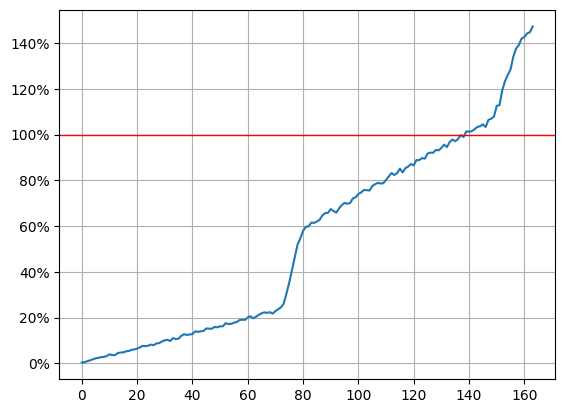

In [22]:
#캐릭터 뽑기 통계(기대값)
data = exp(prob_char)
graph(data)

<ipython-input-21-37fa02a7b68c>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])


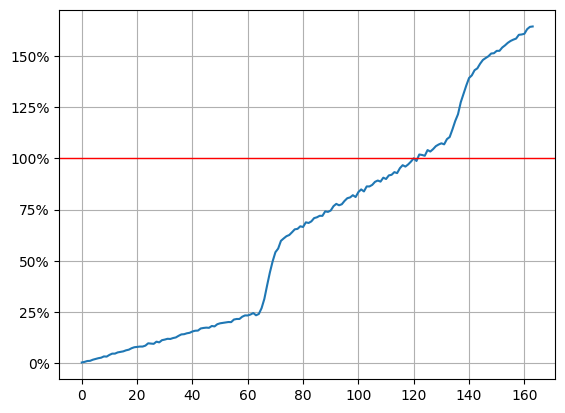

In [23]:
#광추 뽑기 통계(기대값)
data = exp(prob_pick)
graph(data)

<ipython-input-21-37fa02a7b68c>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])


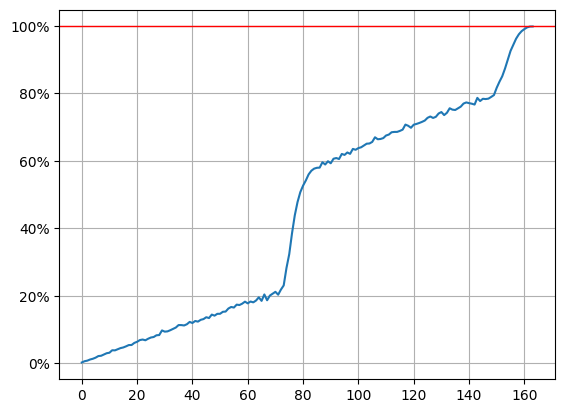

In [24]:
#캐릭터 실확률
data = prob(prob_char)
graph(data)

<ipython-input-21-37fa02a7b68c>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])


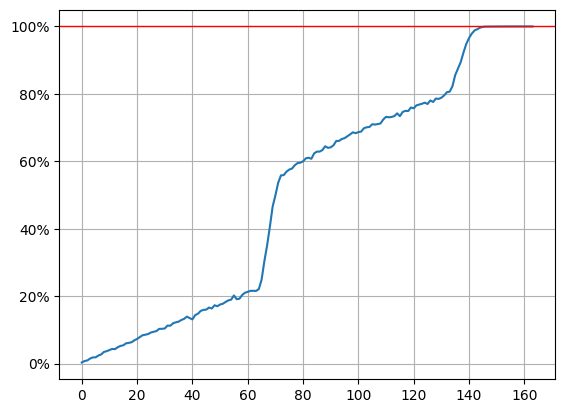

In [25]:
#광추 실확률
data = prob(prob_pick)
graph(data)